Visualization worksheet

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
wb = pd.read_csv("world_bank.csv", index_col=0)
wb = wb.rename(columns={'Antiretroviral therapy coverage: % of people living with HIV: 2015':"HIV rate",
                       'Gross national income per capita, Atlas method: $: 2016':'gni'})
wb.head()

,Continent,Country,Primary completion rate: Male: % of relevant age group: 2015,Primary completion rate: Female: % of relevant age group: 2015,Lower secondary completion rate: Male: % of relevant age group: 2015,Lower secondary completion rate: Female: % of relevant age group: 2015,Youth literacy rate: Male: % of ages 15-24: 2005-14,Youth literacy rate: Female: % of ages 15-24: 2005-14,Adult literacy rate: Male: % ages 15 and older: 2005-14,Adult literacy rate: Female: % ages 15 and older: 2005-14,...,Access to improved sanitation facilities: % of population: 1990,Access to improved sanitation facilities: % of population: 2015,Child immunization rate: Measles: % of children ages 12-23 months: 2015,Child immunization rate: DTP3: % of children ages 12-23 months: 2015,Children with acute respiratory infection taken to health provider: % of children under age 5 with ARI: 2009-2016,Children with diarrhea who received oral rehydration and continuous feeding: % of children under age 5 with diarrhea: 2009-2016,Children sleeping under treated bed nets: % of children under age 5: 2009-2016,Children with fever receiving antimalarial drugs: % of children under age 5 with fever: 2009-2016,Tuberculosis: Treatment success rate: % of new cases: 2014,Tuberculosis: Cases detection rate: % of new estimated cases: 2015
0,Africa,Algeria,106.0,105.0,68.0,85.0,96.0,92.0,83.0,68.0,...,80.0,88.0,95.0,95.0,66.0,42.0,NaN,NaN,88.0,80.0
1,Africa,Angola,NaN,NaN,NaN,NaN,79.0,67.0,82.0,60.0,...,22.0,52.0,55.0,64.0,NaN,NaN,25.9,28.3,34.0,64.0
2,Africa,Benin,83.0,73.0,50.0,37.0,55.0,31.0,41.0,18.0,...,7.0,20.0,75.0,79.0,23.0,33.0,72.7,25.9,89.0,61.0
3,Africa,Botswana,98.0,101.0,86.0,87.0,96.0,99.0,87.0,89.0,...,39.0,63.0,97.0,95.0,NaN,NaN,NaN,NaN,77.0,62.0
5,Africa,Burundi,58.0,66.0,35.0,30.0,90.0,88.0,89.0,85.0,...,42.0,48.0,93.0,94.0,55.0,43.0,53.8,25.4,91.0,51.0


In [3]:
wb.columns.tolist()

['Continent',
 'Country',
 'Primary completion rate: Male: % of relevant age group: 2015',
 'Primary completion rate: Female: % of relevant age group: 2015',
 'Lower secondary completion rate: Male: % of relevant age group: 2015',
 'Lower secondary completion rate: Female: % of relevant age group: 2015',
 'Youth literacy rate: Male: % of ages 15-24: 2005-14',
 'Youth literacy rate: Female: % of ages 15-24: 2005-14',
 'Adult literacy rate: Male: % ages 15 and older: 2005-14',
 'Adult literacy rate: Female: % ages 15 and older: 2005-14',
 'Students at lowest proficiency on PISA: Mathematics: % of 15 year-olds: 2015',
 'Students at lowest proficiency on PISA: Reading: % of 15 year-olds: 2015',
 'Students at lowest proficiency on PISA: Science: % of 15 year-olds: 2015',
 'Population: millions: 2016',
 'Surface area: sq. km thousands: 2016',
 'Population density: people per sq. km: 2016',
 'Gross national income, Atlas method: $ billions: 2016',
 'gni',
 'Purchasing power parity gross natio

## Histograms

You are likely familiar with histograms. A histogram collects continuous data into bins, then plots this binned data. Each bin reflects the density of datapoints with values that lie between the left and right ends of the bin.

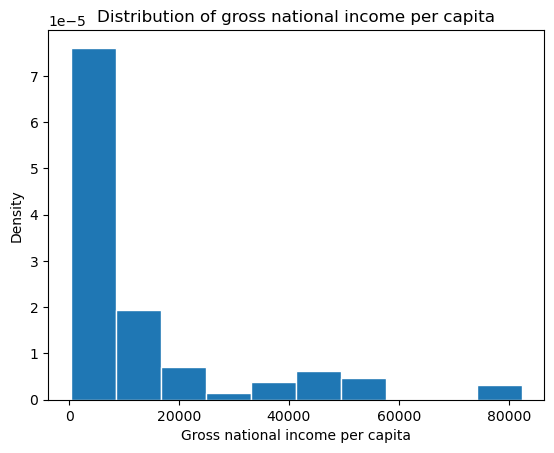

In [5]:
# The `edgecolor` argument controls the color of the bin edges

plt.hist(x=wb['gni'], edgecolor='white', density=True)

# Add labels
plt.xlabel("Gross national income per capita")
plt.ylabel("Density")
plt.title("Distribution of gross national income per capita");

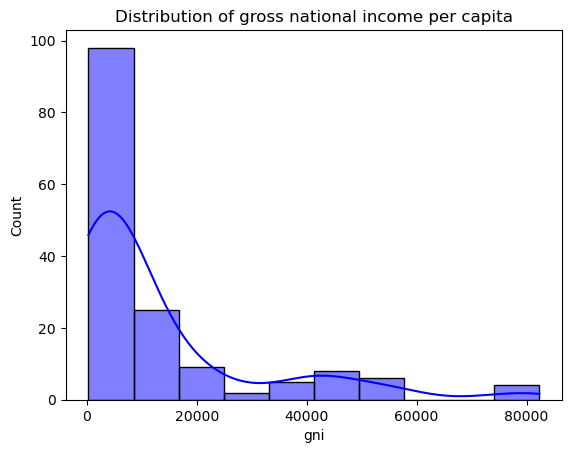

In [6]:
sns.histplot(wb['gni'], bins=10, kde=True, color='blue')
plt.title("Distribution of gross national income per capita");

In Data 100, we describe a "mode" of a histogram as a peak in the distribution. Often, however, it is difficult to determine what counts as its own "peak." For example, the number of peaks in the distribution of HIV rates across different countries varies depending on the number of histogram bins we plot. 

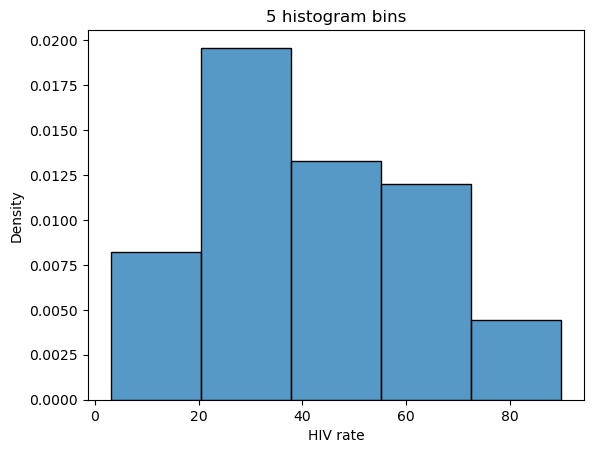

In [14]:
# With 5 bins, it seems that there is only one peak
sns.histplot(wb['HIV rate'], bins = 5,  stat="density")
plt.title("5 histogram bins");

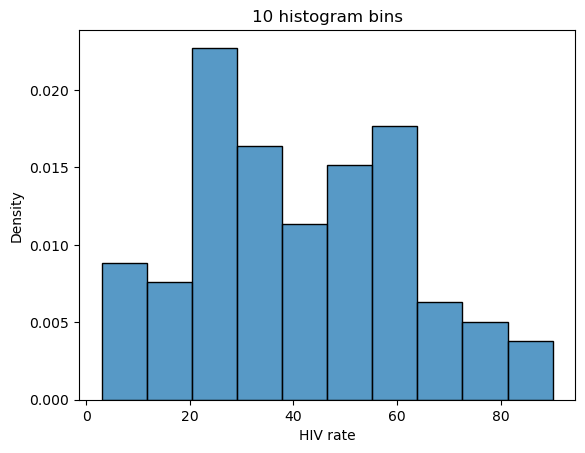

In [15]:
# With 10 bins, there seem to be two peaks
sns.histplot(wb['HIV rate'], bins = 10,  stat="density")
plt.title("10 histogram bins");

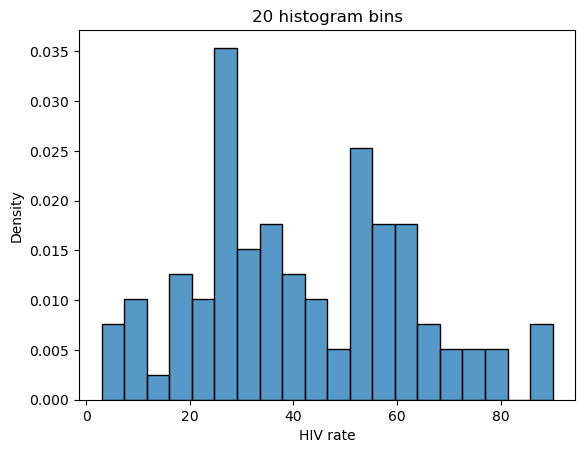

In [16]:
# And with 20 bins, it becomes hard to say what counts as a "peak"!
sns.histplot(wb['HIV rate'], bins = 20,  stat="density")
plt.title("20 histogram bins");

As this example illustrates, it is sometimes more useful to understand the general structure of our data, rather than focus on individual observations. Kernel density estimation helps with this goal.

We can overlay histograms (or density curves) to compare distributions across qualitative categories.

The `hue` parameter of `sns.histplot` specifies the column that should be used to determine the color of each category. `hue` can be used in many Seaborn plotting functions.

Notice that the resulting plot includes a legend describing which color corresponds to each hemisphere – a legend should always be included if color is used to encode information in a visualization!

In [17]:
# Create a new variable to store the hemisphere in which each country is located
north = ["Asia", "Europe", "N. America"]
south = ["Africa", "Oceania", "S. America"]
wb.loc[wb["Continent"].isin(north), "Hemisphere"] = "Northern"
wb.loc[wb["Continent"].isin(south), "Hemisphere"] = "Southern"

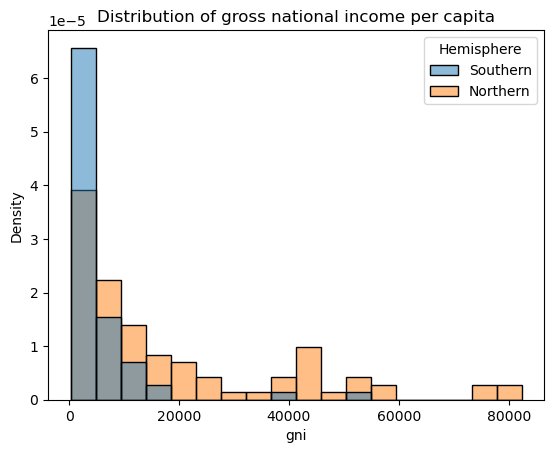

In [18]:
sns.histplot(data=wb, x="gni", 
             hue="Hemisphere", stat="density")
plt.title("Distribution of gross national income per capita");

<br/>

---

## Toy KDE Example

In [19]:
points = [2.2, 2.8, 3.7, 5.3, 5.7]

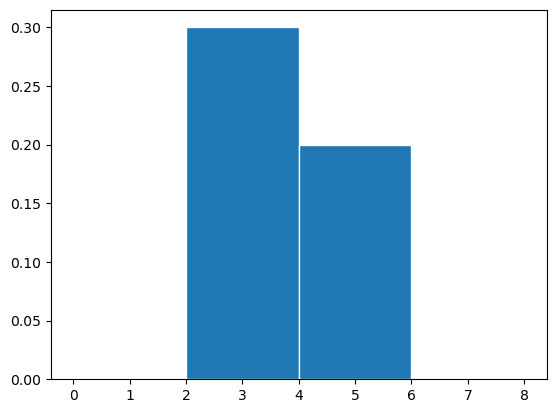

In [20]:
plt.hist(points, bins=range(0, 10, 2), ec='w', density=True);

Let's define some **kernels**. We will explain these formulas momentarily. We'll also define some helper functions for visualization purposes.

In [21]:
def gaussian(x, z, a):
    # Gaussian kernel
    return (1/np.sqrt(2*np.pi*a**2)) * np.exp((-(x - z)**2 / (2 * a**2)))

def boxcar_basic(x, z, a):
    # Boxcar kernel
    if np.abs(x - z) <= a/2:
        return 1/a
    return 0

def boxcar(x, z, a):
    # Boxcar kernel
    cond = np.abs(x - z)
    return np.piecewise(x, [cond <= a/2, cond > a/2], [1/a, 0] )

In [22]:
def create_kde(kernel, pts, a):
    # Takes in a kernel, set of points, and alpha
    # Returns the KDE as a function
    def f(x):
        output = 0
        for pt in pts:
            output += kernel(x, pt, a)
        return output / len(pts) # Normalization factor
    return f

def plot_kde(kernel, pts, a):
    # Calls create_kde and plots the corresponding KDE
    f = create_kde(kernel, pts, a)
    x = np.linspace(min(pts) - 5, max(pts) + 5, 1000)
    y = [f(xi) for xi in x]
    plt.plot(x, y);
    
def plot_separate_kernels(kernel, pts, a, norm=False):
    # Plots individual kernels, which are then summed to create the KDE
    x = np.linspace(min(pts) - 5, max(pts) + 5, 1000)
    for pt in pts:
        y = kernel(x, pt, a)
        if norm:
            y /= len(pts)
        plt.plot(x, y)
    
    plt.show();

Here are our five points.

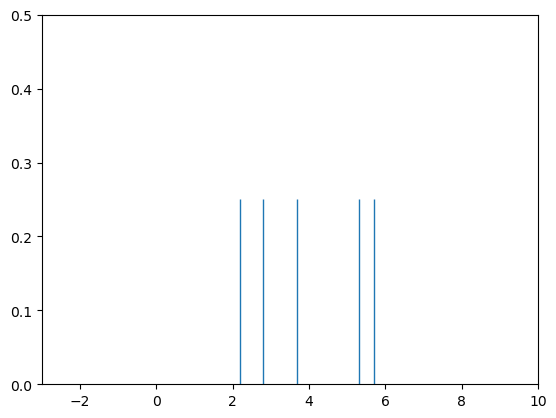

In [24]:
plt.xlim(-3, 10)
plt.ylim(0, 0.5)
sns.rugplot(points, height=0.5);

### Step 1: Place a kernel at each point

We'll start with the Gaussian kernel.

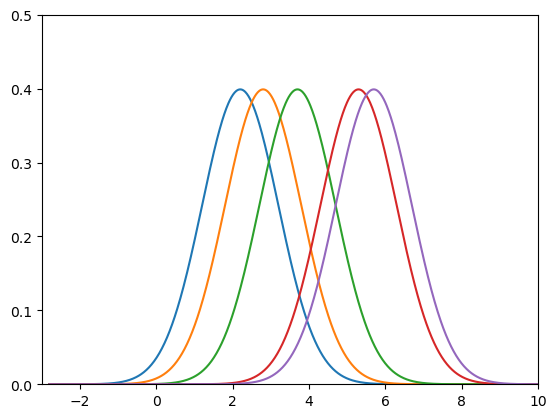

In [25]:
plt.xlim(-3, 10)
plt.ylim(0, 0.5)
plot_separate_kernels(gaussian, points, a = 1);

### Step 2: Normalize kernels so that total area is 1

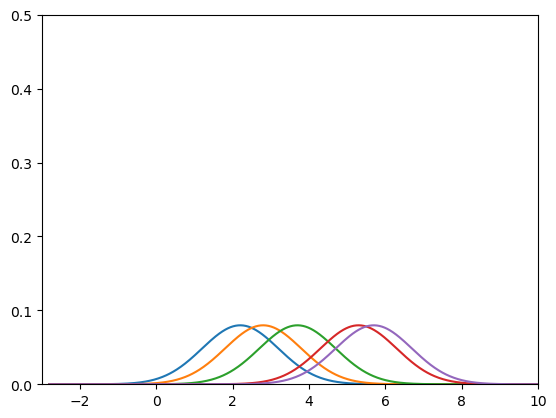

In [26]:
plt.xlim(-3, 10)
plt.ylim(0, 0.5)
plot_separate_kernels(gaussian, points, a = 1, norm = True);

### Step 3: Sum all kernels together

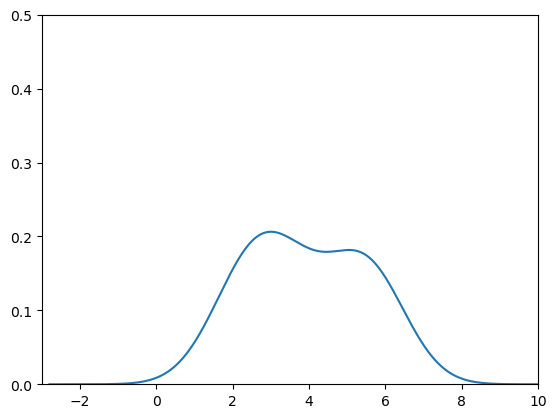

In [27]:
plt.xlim(-3, 10)
plt.ylim(0, 0.5)
plot_kde(gaussian, points, a = 1)

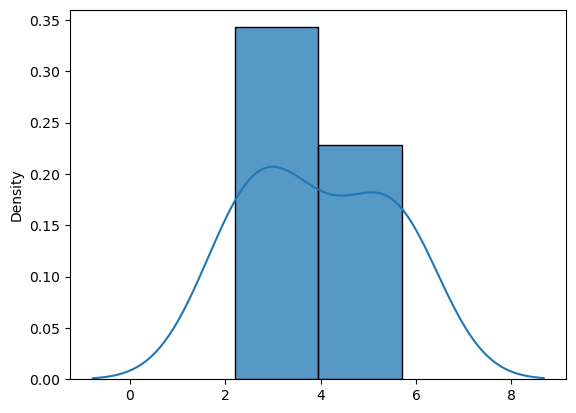

In [28]:
sns.kdeplot(points, bw_method=0.65)  # magic value!
sns.histplot(points, stat='density', bins=2);

You can also get a very similar result in a single call by requesting the KDE be added to the histogram, with `kde=True` and some extra keywords:

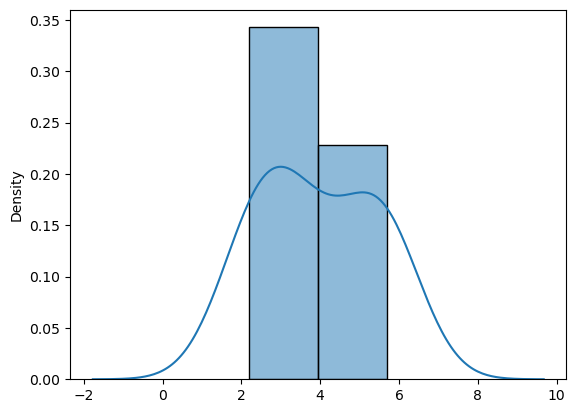

In [29]:
sns.histplot(points, bins=2, kde=True, stat='density', 
             kde_kws=dict(cut=4, bw_method=0.65));

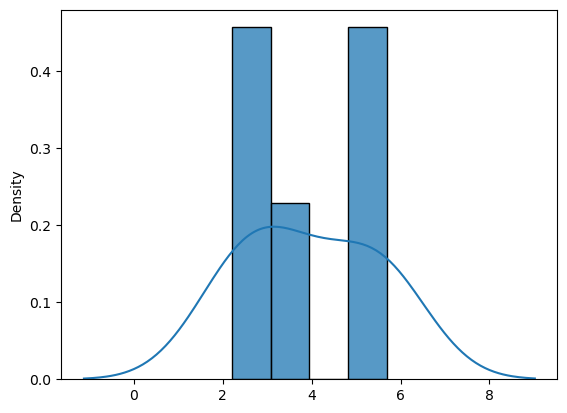

In [30]:
sns.kdeplot(points, bw_adjust=1)
sns.histplot(points, stat='density');

## Kernels

**Gaussian**

$$K_{\alpha}(x, x_i) = \frac{1}{\sqrt{2 \pi \alpha^2}} e^{-\frac{(x - x_i)^2}{2\alpha^2}}$$


**Boxcar**


$$K_{\alpha}(x, x_i) = \begin {cases}
			\frac{1}{\alpha}, \: \: \: |x - x_i| \leq \frac{\alpha}{2}\\
			0, \: \: \: \text{else}
			\end{cases}$$

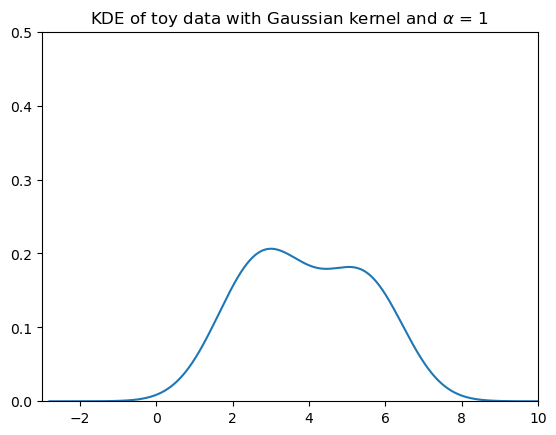

In [31]:
plt.xlim(-3, 10)
plt.ylim(0, 0.5)
plt.title(r'KDE of toy data with Gaussian kernel and $\alpha$ = 1')
plot_kde(gaussian, points, a = 1)

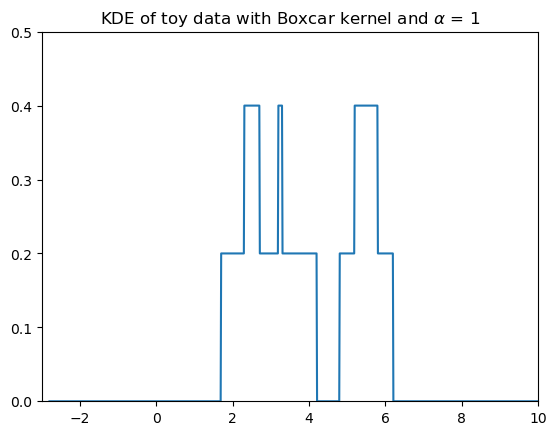

In [32]:
plt.xlim(-3, 10)
plt.ylim(0, 0.5)
plt.title(r'KDE of toy data with Boxcar kernel and $\alpha$ = 1')
plot_kde(boxcar, points, a = 1)

## Effect of bandwidth hyperparameter $\alpha$


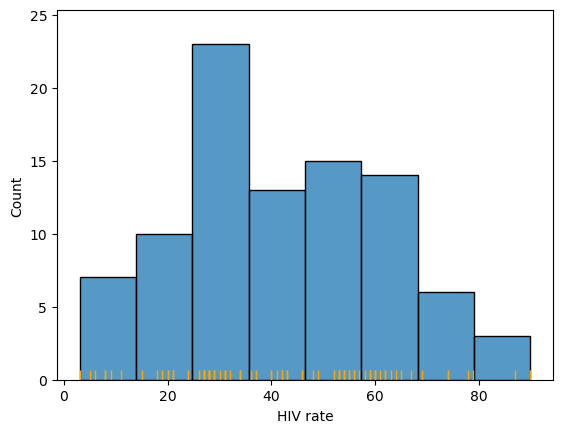

In [33]:
vals = wb['HIV rate'].dropna()
ax = sns.histplot(vals)
sns.rugplot(vals, color='orange', ax=ax);

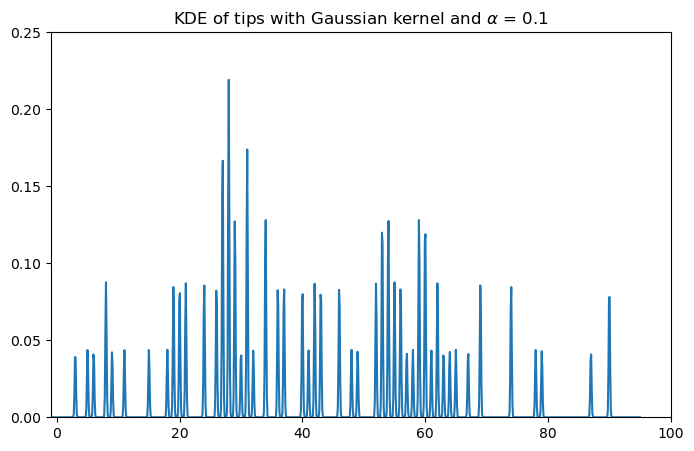

In [34]:
plt.figure(figsize=(8, 5))
plt.ylim(0, 0.25)
plt.xlim(-1, 100)
plt.title(r'KDE of tips with Gaussian kernel and $\alpha$ = 0.1')
plot_kde(gaussian, vals, a = 0.1)

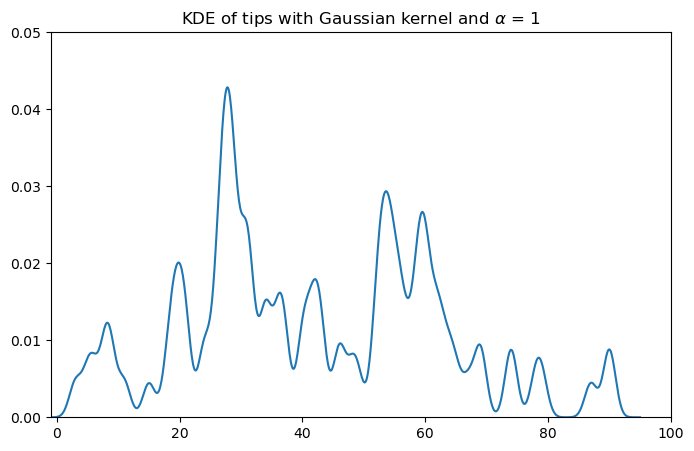

In [35]:
plt.figure(figsize=(8, 5))
plt.ylim(0, 0.05)
plt.xlim(-1, 100)
plt.title(r'KDE of tips with Gaussian kernel and $\alpha$ = 1')
plot_kde(gaussian, vals, a = 1)

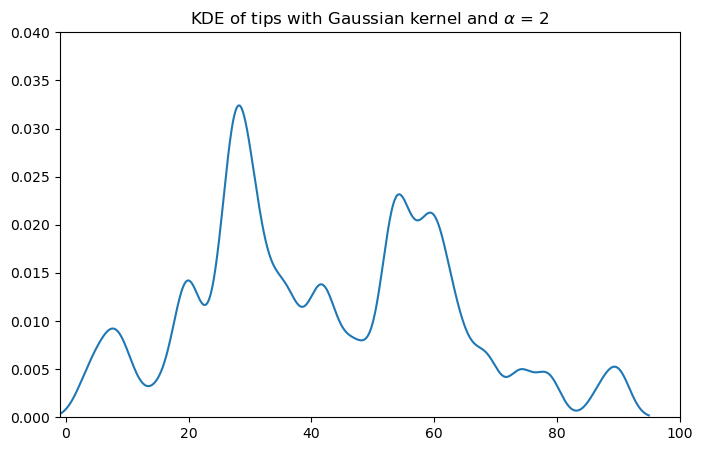

In [36]:
plt.figure(figsize=(8, 5))
plt.ylim(0, 0.04)
plt.xlim(-1, 100)
plt.title(r'KDE of tips with Gaussian kernel and $\alpha$ = 2')
plot_kde(gaussian, vals, a = 2)

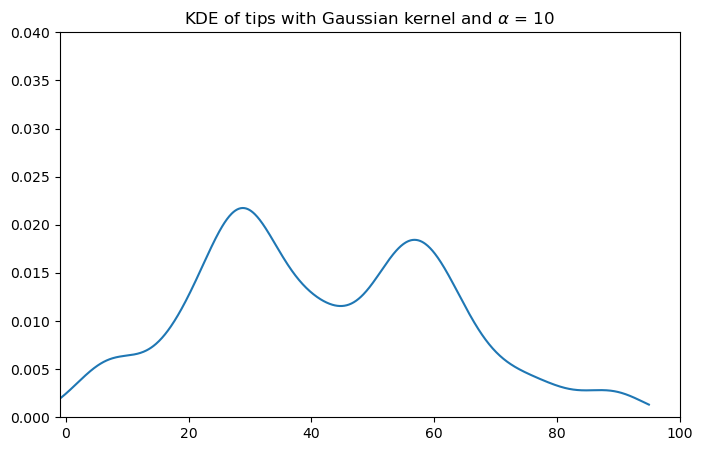

In [37]:
plt.figure(figsize=(8, 5))
plt.ylim(0, 0.04)
plt.xlim(-1, 100)
plt.title(r'KDE of tips with Gaussian kernel and $\alpha$ = 10')
plot_kde(gaussian, vals, a = 5)

### KDE Formula

$$f_{\alpha}(x) = \sum_{i = 1}^n \frac{1}{n} \cdot K_{\alpha}(x, x_i) =  \frac{1}{n} \sum_{i = 1}^n K_{\alpha}(x, x_i)$$

# Diving into `displot`

Seaborn [documentation](https://seaborn.pydata.org/generated/seaborn.displot.html) for `sns.displot` lets you specify the `kind` of plot.

When plotting a histogram,  you can pass in `histplot` ([link](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot)) parameters to `displot` to specify histogram-specific features.

For example, `stat=density` normalizes the histogram such that the area under the histogram is 1.

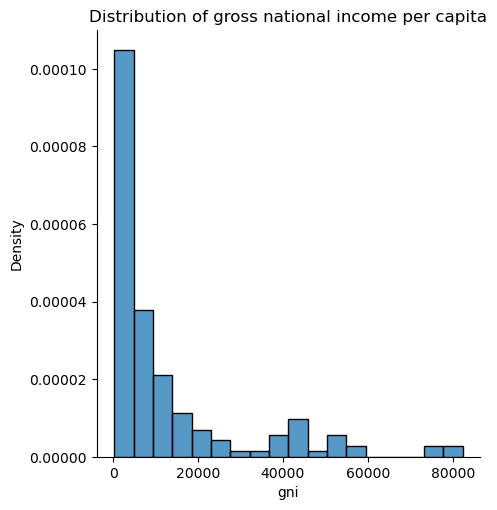

In [38]:
sns.displot(data=wb, 
            x="gni", 
            kind="hist", 
            stat="density") # default: stat=count and density integrates to 1
plt.title("Distribution of gross national income per capita");

What does it mean to specify `kind=kde`? We will explore this!

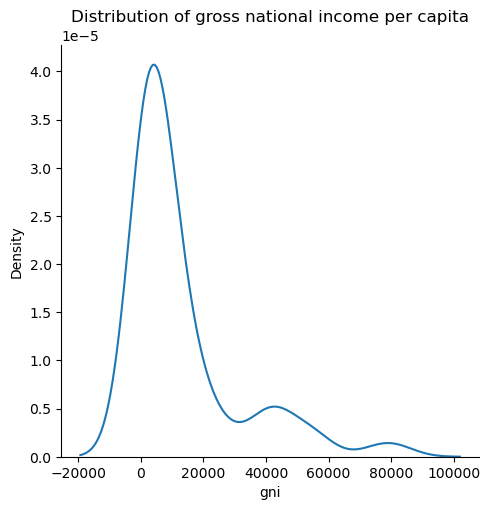

In [39]:
sns.displot(data=wb, 
            x="gni", 
            kind='kde')
plt.title("Distribution of gross national income per capita");

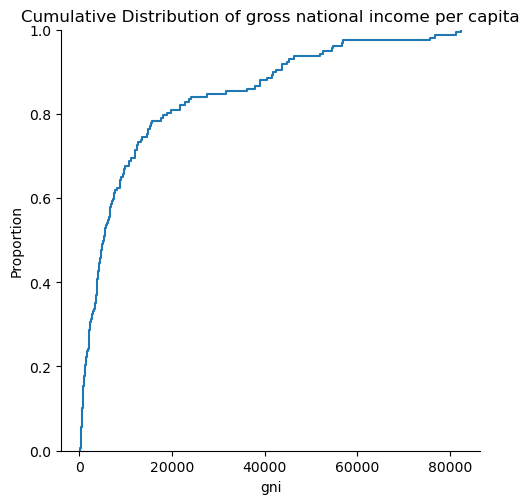

In [41]:
sns.displot(data=wb, 
            x="gni", 
            kind='ecdf')
plt.title("Cumulative Distribution of gross national income per capita");

## Scatter Plots

Scatter plots are used to visualize the **relationship** between two **quantitative continuous variables**.

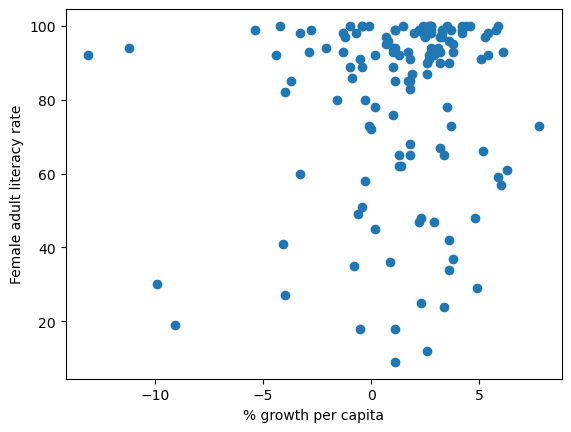

In [53]:
plt.scatter(wb['per capita: % growth: 2016'], wb['Adult literacy rate: Female: % ages 15 and older: 2005-14'])
plt.xlabel("% growth per capita")
plt.ylabel("Female adult literacy rate");

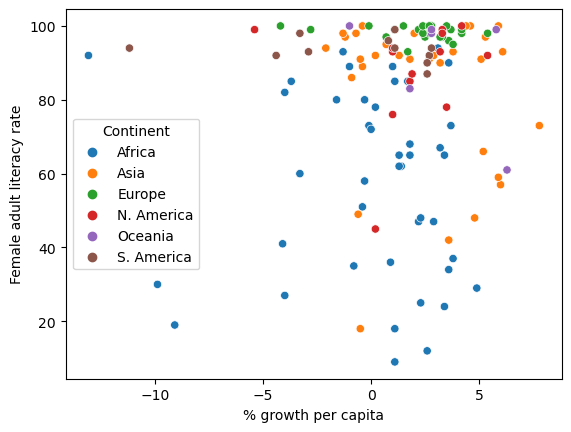

In [56]:
sns.scatterplot(wb, x ='per capita: % growth: 2016', y='Adult literacy rate: Female: % ages 15 and older: 2005-14', hue='Continent')
plt.xlabel("% growth per capita")
plt.ylabel("Female adult literacy rate");

The plots above suffer from **overplotting** – many scatter points are stacked on top of one another (particularly in the upper right region of the plot). 

**Jittering** is a processed used to address overplotting. A small amount of random noise is added to the x and y values of all datapoints. 

Decreasing the size of each scatter point using the `s` parameter of `plt.scatter` also helps.

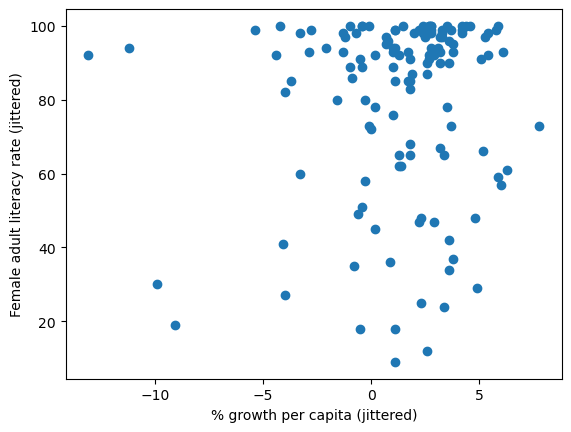

In [57]:
random_x_noise = np.random.uniform(-1, 1, len(wb))
random_y_noise = np.random.uniform(-5, 5, len(wb))

plt.scatter(wb['per capita: % growth: 2016'], wb['Adult literacy rate: Female: % ages 15 and older: 2005-14'])

plt.xlabel("% growth per capita (jittered)")
plt.ylabel("Female adult literacy rate (jittered)");

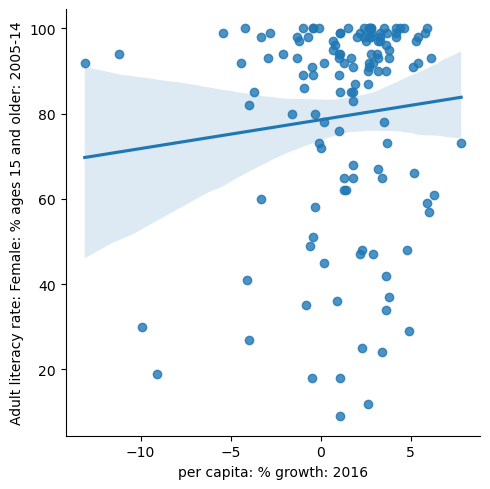

In [58]:
sns.lmplot(data=wb, x='per capita: % growth: 2016', \
           y='Adult literacy rate: Female: % ages 15 and older: 2005-14');

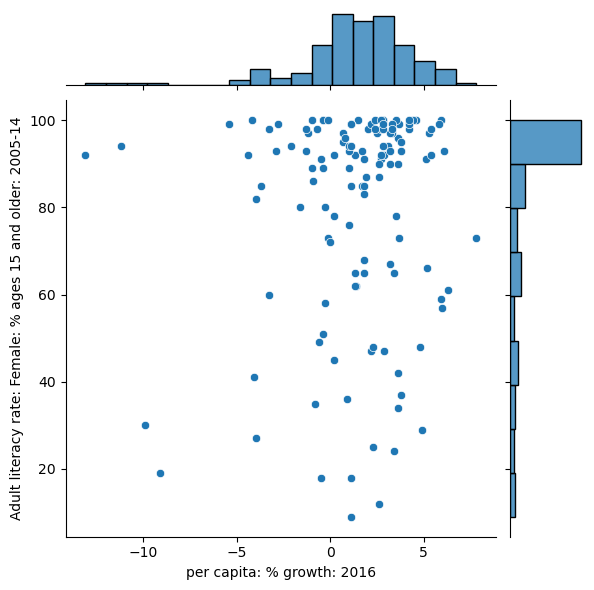

In [59]:
sns.jointplot(data=wb, x='per capita: % growth: 2016', \
              y='Adult literacy rate: Female: % ages 15 and older: 2005-14');

## Hex Plots

Rather than plot individual datapoints, plot the *density* of how datapoints are distributed in 2D. A darker hexagon means that more datapoints lie in that region.

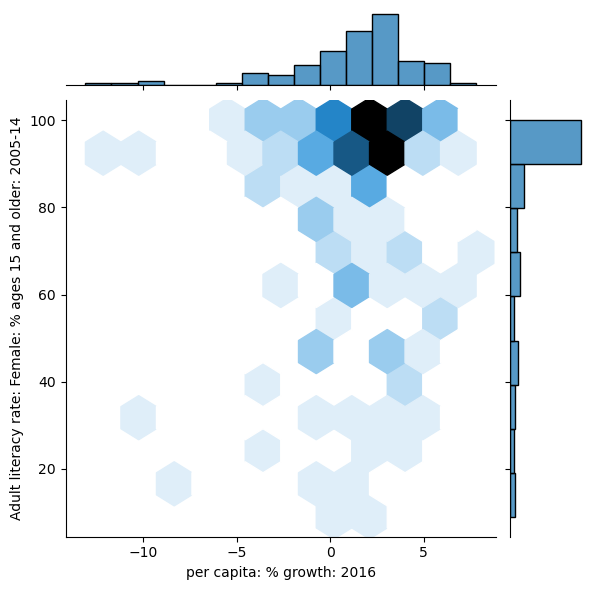

In [60]:
sns.jointplot(data=wb, x='per capita: % growth: 2016', \
              y='Adult literacy rate: Female: % ages 15 and older: 2005-14',
              kind='hex');

## Contour Plots

Contour plots are similar to topographic maps. Contour lines of the same color have the same *density* of datapoints. The region with the darkest color contains the most datapoints of all regions.We can think of a contour plot as the 2D equivalent of a KDE curve.

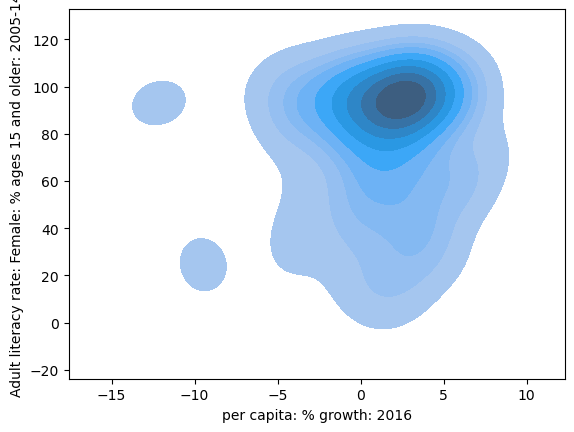

In [61]:
sns.kdeplot(data=wb, x='per capita: % growth: 2016', \
              y='Adult literacy rate: Female: % ages 15 and older: 2005-14', fill=True);

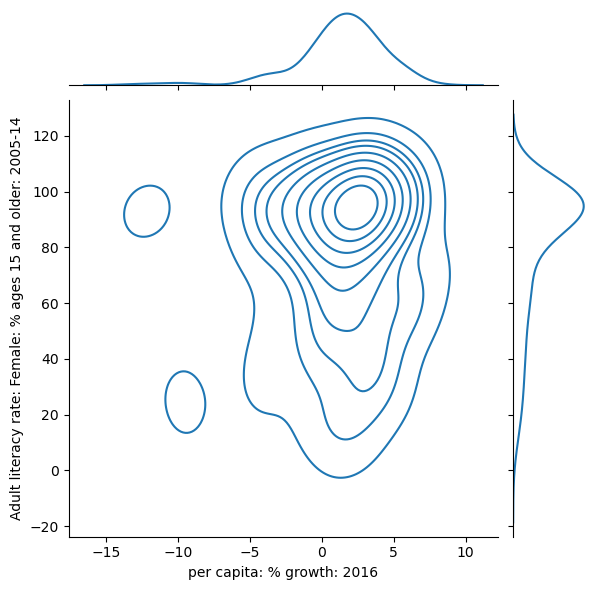

In [62]:
sns.jointplot(data=wb, x='per capita: % growth: 2016', \
              y='Adult literacy rate: Female: % ages 15 and older: 2005-14',
              kind='kde');

## Transformations

Often, our reason for visualizing relationships like we did above is beause we then want to *model* these relationships. We will start talking about the theory and math underlying modeling processes next week.

We will focus a lot on **linear modeling** in Data 100. This means that it is often helpful to transform and **linearize** our data such that it shows roughly a linear relationship. There are a few reasons for this:
* Transforming data makes visualizations easier to interpret
* Linear relationships are straightforward to understand – we have ideas of what slopes and intercepts mean
* Later on in the course, the ability to linearize data will help us make more effective models


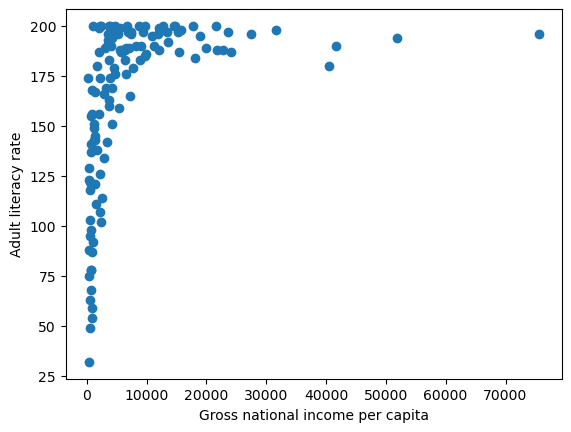

In [63]:
# Some data cleaning to help with the next example

df = pd.DataFrame(index=wb.index)
df['lit'] = wb['Adult literacy rate: Female: % ages 15 and older: 2005-14'] \
            + wb["Adult literacy rate: Male: % ages 15 and older: 2005-14"]
df['inc'] = wb['gni']
df.dropna(inplace=True)

plt.scatter(df["inc"], df["lit"])
plt.xlabel("Gross national income per capita")
plt.ylabel("Adult literacy rate");

What is making this plot non-linear?
* There are a few extremely large values for gross national income that are distoring the horizontal scale of the plot. If we rescaled the x-values such that these large values become proportionally smaller, the plot would be more linear
* There are too many large values of adult literacy rate all clumped together at the top of the plot. If we rescaled the y-axis such that large values of y are more spread out, the plot would be more linear

First, we can transform the x-values such that very large values of x become smaller. This can be achieved by performing a **log transformation** of the gross national income data. When we take the logarithm of a large number, this number becomes proportionally much smaller relative to its original value. When we take the log of a small number, the number does not change very significantly relative to its starting value.

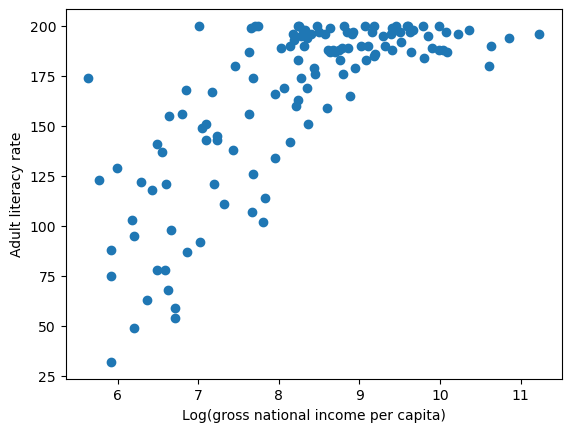

In [64]:
# np.log compute the natural (base e) logarithm
plt.scatter(np.log(df["inc"]), df["lit"])
plt.xlabel("Log(gross national income per capita)")
plt.ylabel("Adult literacy rate");

Already, the relationship is starting to look more linear! Now, we'll address the vertical scaling. 

To reduce the clumping of datapoints near the top of the plot, we want to spread out large values of y without substantially changing small values of y. We can do this by applying a **power transformation** – that is, by raising the y-values to a power. Below, we raise all y-values to the power of 4.

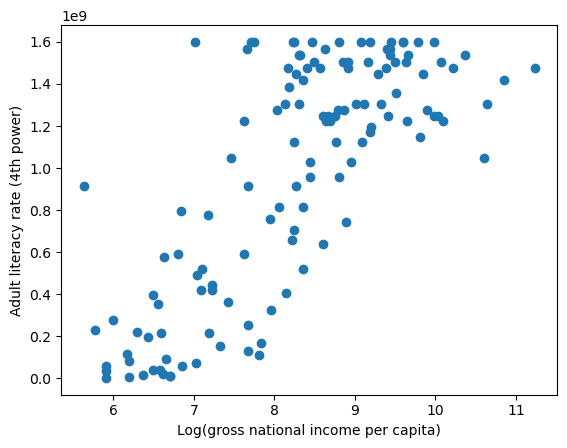

In [65]:
plt.scatter(np.log(df["inc"]), df["lit"]**4)
plt.xlabel("Log(gross national income per capita)")
plt.ylabel("Adult literacy rate (4th power)");

Our transformed variables now seem to follow a linear relationship! 

$$y^4 = m(\log{x}) + b$$

We can use this fact to uncover new information about the original, untransformed variables. 

$$y = [m(\log{x}) + b]^{1/4}$$

In the cell below, we first fit a regression line to the transformed data to find values for the slope ($m$) and intercept ($b$). Then, we plug these values into the relationship we derived for the *untransformed* variables. We find a mathematical relationship relating the gross national income and the adult literacy rate.

The slope, m, of the transformed data is: 336400693.43172705
The intercept, b, of the transformed data is: -1802204836.0479987


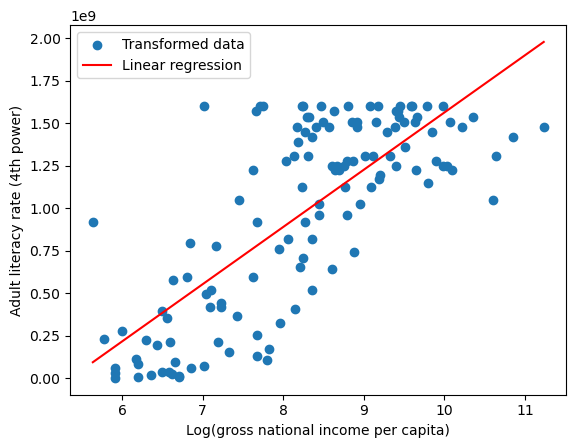

In [66]:
# The code below fits a linear regression model. We'll discuss it at length in a future lecture
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(np.log(df[["inc"]]), df["lit"]**4)
m, b = model.coef_[0], model.intercept_

print(f"The slope, m, of the transformed data is: {m}")
print(f"The intercept, b, of the transformed data is: {b}")

df = df.sort_values("inc")
plt.scatter(np.log(df["inc"]), df["lit"]**4, label="Transformed data")
plt.plot(np.log(df["inc"]), m*np.log(df["inc"])+b, c="red", label="Linear regression")
plt.xlabel("Log(gross national income per capita)")
plt.ylabel("Adult literacy rate (4th power)")
plt.legend();

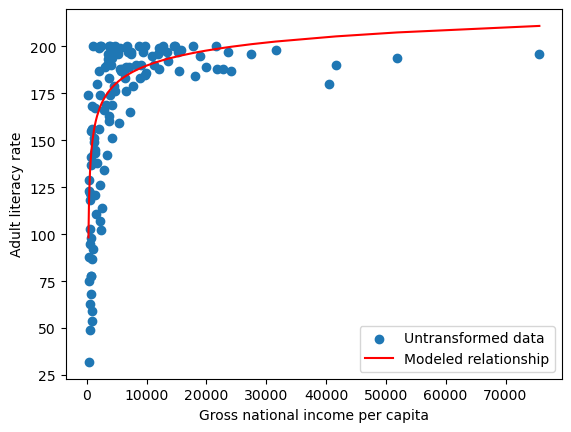

In [68]:
# Now, plug the values for m and b into the relationship between the untransformed x and y
plt.scatter(df["inc"], df["lit"], label="Untransformed data")
plt.plot(df["inc"], (m*np.log(df["inc"])+b)**(1/4), c="red", label="Modeled relationship")
plt.xlabel("Gross national income per capita")
plt.ylabel("Adult literacy rate")
plt.legend();

We've been able to find a fairly close approximation for the relationship between the original variables!

<br/>

---

# Scale

In [69]:
ppdf = pd.DataFrame(dict(Cancer=[2007371, 935573], Abortion=[289750, 327000]), 
                    index=pd.Series([2006, 2013], 
                    name="Year"))
ppdf

,Cancer,Abortion
Year,,
2006,2007371,289750
2013,935573,327000


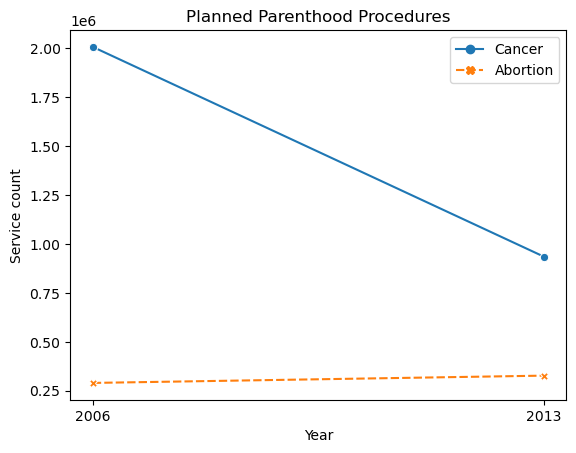

In [70]:
ax = sns.lineplot(data=ppdf, markers=True)
ax.set_title("Planned Parenthood Procedures")
ax.set_xticks([2006, 2013])
ax.set_ylabel("Service count");